### Loading data binaries

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
from VUDA.io.loadbinary import LoadBinary

In [3]:
filepath = "/home/vinicius/funcog/vanderbilt/neural_data/s"

In [4]:
# aHPC_B_cnct.dat - includes CA1
# pHPC - posterior HIPPOCMAPUS

#### Plot load binary function docstring

In [5]:
perpl_LoadBinary?

Object `perpl_LoadBinary` not found.


#### Load data

In [6]:
data = LoadBinary(
    filepath,
    frequency=30000,
    nSamplesPerChannel=3000,
    channels=None,
    downsample=1,
    bitVolts=0.195,
    nChannels=64,
    precision=np.int16,
    verbose=False,
)

In [8]:
print(data)
print(data.shape)

<xarray.DataArray (times: 3000, channels: 64)>
array([[  71.955,   34.515,   27.3  , ...,   62.79 ,   10.335,   82.875],
       [  70.59 ,   34.71 ,   28.275, ...,   63.375,    9.555,   78.78 ],
       [  69.615,   34.71 ,   34.125, ...,   58.11 ,   11.7  ,   75.075],
       ...,
       [  44.655,   36.855,   70.005, ...,  -29.64 ,   17.355, -109.59 ],
       [  45.825,   37.635,   54.795, ...,  -23.595,   17.94 , -102.57 ],
       [  44.07 ,   38.22 ,   54.99 , ...,  -19.89 ,   23.205, -104.91 ]])
Coordinates:
  * channels  (channels) int64 1 2 3 4 5 6 7 8 9 ... 56 57 58 59 60 61 62 63 64
Dimensions without coordinates: times
(3000, 64)


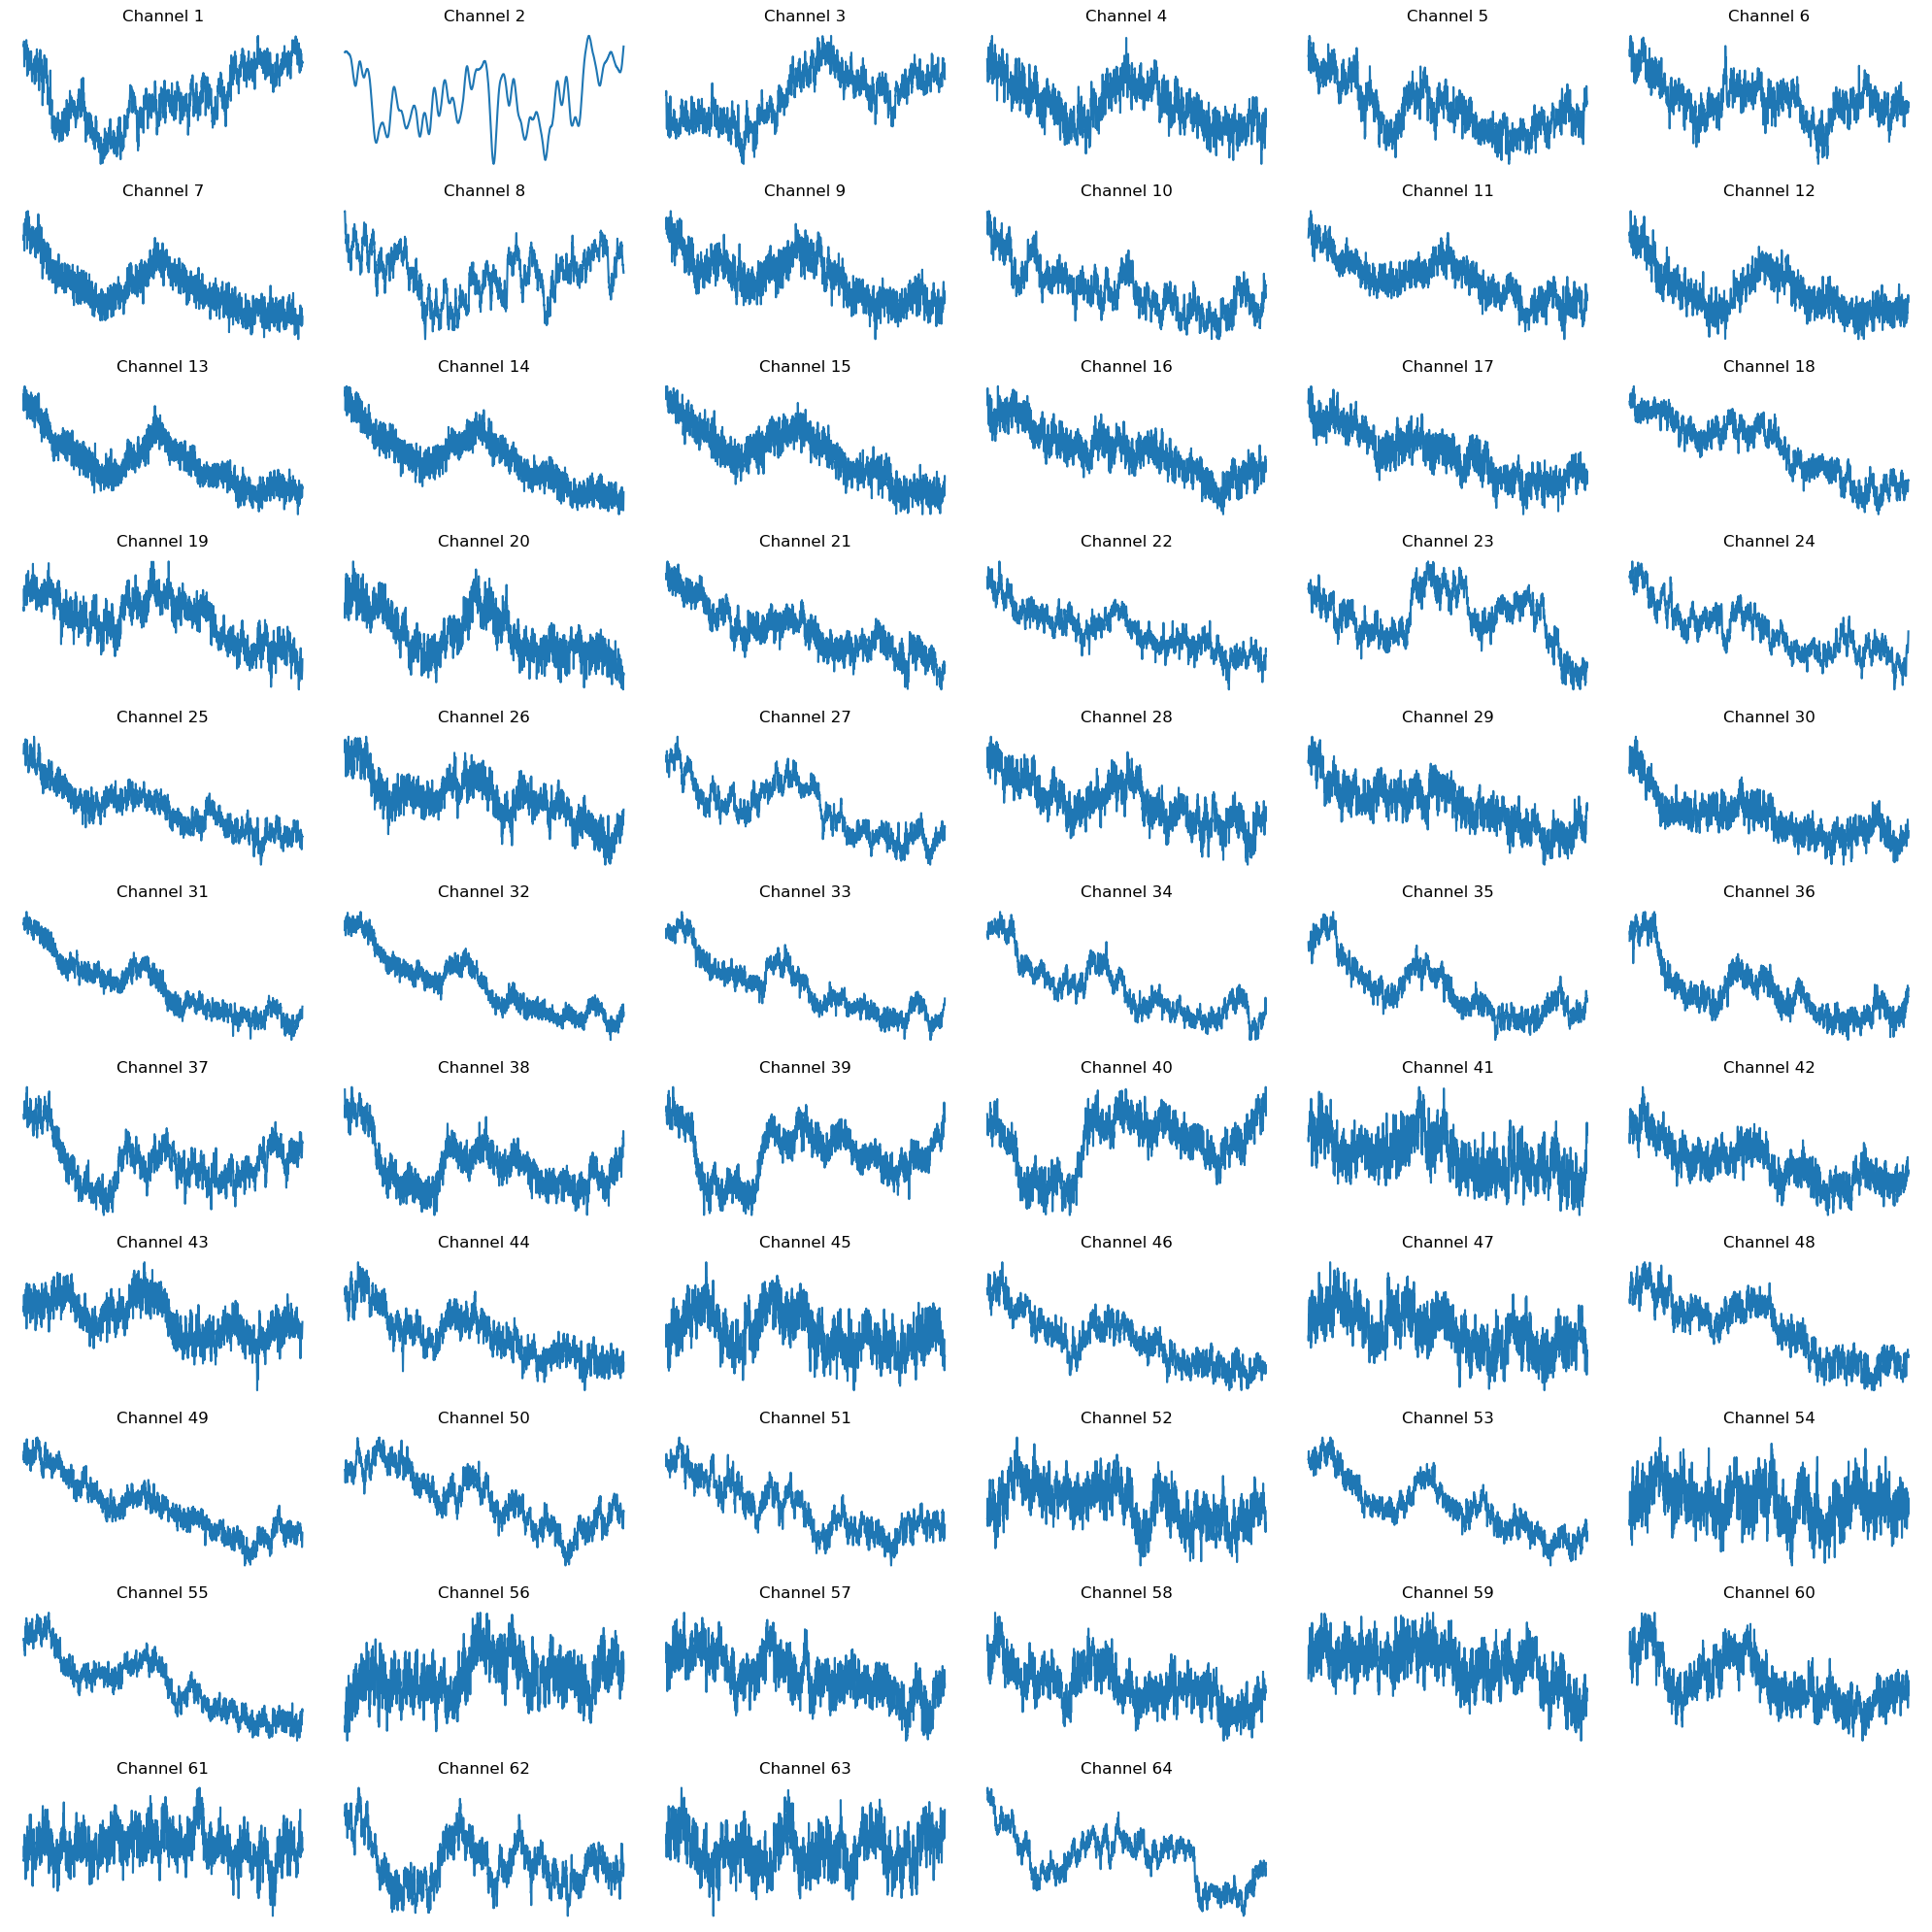

In [9]:
plt.figure(figsize=(20, 20))
for i in range(data.shape[1]):
    plt.subplot(11, 6, i + 1)
    plt.plot(data[:, i])
    plt.title(f"Channel {i + 1}")
    plt.axis("off")
plt.tight_layout()

#### Save data for different parameters to compare with Matlab version

In [10]:
downsample = [1, 10, 20]
channels = [1, 5, 10, 23, 55]

#### Different sample sizes

#### Different durations (in seconds)

### Using Data Loader to load and preprocess raw data

In [11]:
from VUDA.io.dataloader import DataLoader

In [12]:
DataLoader?

Init signature: DataLoader(filename: str, rec_info: str) -> None
Docstring:      Class to load data and preprocess it.
File:           ~/anaconda3/envs/ipp/lib/python3.9/site-packages/VUDA/io/dataloader.py
Type:           type
Subclasses:     

In [13]:
rec_info = os.path.expanduser(
    "/home/vinicius/storage1/projects/vanderbilt/recording_params.json"
)

In [14]:
loader = DataLoader(filepath, rec_info)

In [15]:
loader.loadbinary(nSamplesPerChannel=100000, downsample=30, verbose=True)

INFO:root:Loading binaries from /home/vinicius/funcog/vanderbilt/neural_data/aHPC_B_cnct.dat with:
fsample = 30000, start = 0, duration = None, offset = 0, nSamplesPerChannel = 100000, nChannels = 64, precision = <class 'numpy.int16'>, downsample = 30, bitVolts = 0.195.
Loading batches: 20/21: 100%|████████████████████████████████| 21/21 [00:00<00:00, 463.54it/s]


In [16]:
loader

DataLoader(data=<xarray.DataArray (times: 3333, channels: 64)>
array([[  71.955,   34.515,   27.3  , ...,   62.79 ,   10.335,   82.875],
       [  76.635,   34.32 ,    1.95 , ...,   62.79 ,   11.7  ,   71.37 ],
       [  46.215,   31.785,  -16.77 , ...,   58.695,   23.985,   49.92 ],
       ...,
       [-142.545,  -35.88 ,   38.025, ..., -150.54 ,   -5.655,  -41.73 ],
       [-172.575,  -48.555,   35.1  , ..., -163.02 ,  -15.795,  -64.155],
       [-137.085,  -45.045,   34.905, ..., -178.62 ,  -14.82 ,  -96.525]])
Coordinates:
  * channels  (channels) int64 1 2 3 4 5 6 7 8 9 ... 56 57 58 59 60 61 62 63 64
Dimensions without coordinates: times)

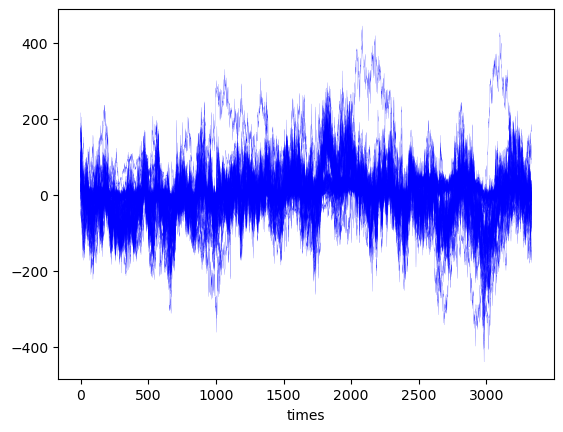

In [17]:
loader.data.plot(hue="channels", color="b", lw=0.1)
plt.legend([], frameon=False)

In [18]:
loader.filter(0, 120, {})

Setting up low-pass filter at 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 30.00 Hz (-6 dB cutoff frequency: 135.00 Hz)
- Filter length: 111 samples (0.111 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


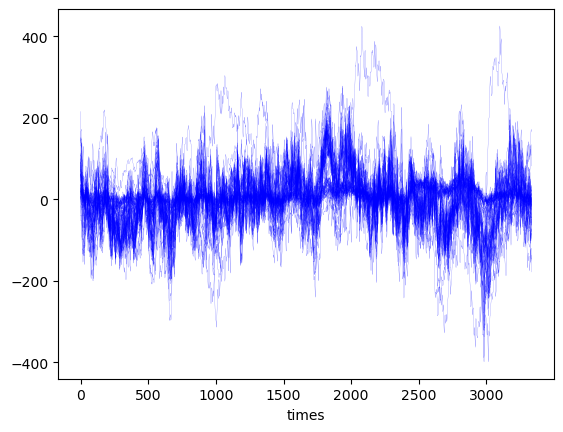

In [19]:
loader.data.plot(hue="channels", color="b", lw=0.1)
plt.legend([], frameon=False)